<a href="https://colab.research.google.com/github/OllyMuh/ML_algorythms/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ДЗ 3. Классификация. Логистическая регрессия**

## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [ ]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [ ]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [ ]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

**1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [ ]:
from numpy import errstate, isneginf

In [ ]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred,  where=0<y_pred, out=0*y_pred) + (1.0 - y) * np.log(1.0 - y_pred, where=1>y_pred, out=1*y_pred))
    # err = -np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [ ]:
# Пример применения
y1 = np.array([1, 0, 2])
y_pred1 = np.array([0.9, 0.2, 1])
calc_logloss(y1, y_pred1)

0.4428346889906787

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
z = np.linspace(-10, 10, 101)

In [ ]:
probabilities = sigmoid(z)

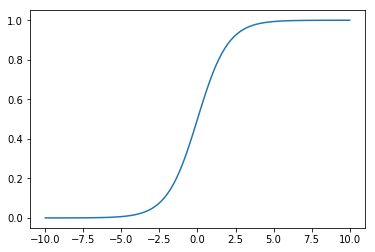

In [ ]:
plt.plot(z, probabilities)
plt.show()

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

Logistic Regression

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
W = eval_model(X_st, y, iterations=10000, alpha=3)
# изменила iterations с 5000 на 10000, alpha на 3

1000 [-23.42469498  -2.47415836  -6.13383009  19.51328768] 0.1505432366507139
2000 [-29.7273558   -3.06490624  -7.94230071  24.53028455] 0.12537353706992074
3000 [-34.39843897  -3.48572045  -9.26052321  28.30439472] 0.11264867258267912
4000 [-38.20421029  -3.82444202 -10.33397168  31.36555856] 0.10425083847854826
5000 [-41.46890563  -4.11024348 -11.25720123  33.9788117 ] 0.09809968927884229
6000 [-44.36562413  -4.35893251 -12.07988492  36.28573529] 0.09327703268157721
7000 [-46.99704183  -4.57999229 -12.83113535  38.37038941] 0.08931280007109313
8000 [-49.42875689  -4.77955821 -13.52935463  40.28658216] 0.08594011279832246
9000 [-51.70502492  -4.96184506 -14.18681893  42.07074581] 0.08299550560295448
10000 [-53.85695151  -5.12989737 -14.81204311  43.74864006] 0.08037290928115966


**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.**

In [ ]:
def calc_pred_proba(W, X):
  m = X.shape[1]
  w = W.reshape(X.shape[0], 1)
  y_pred_proba = sigmoid(np.dot(w.T, X))
  return y_pred_proba

In [ ]:
calc_pred_proba(W, X_st)

array([[3.25527468e-01, 1.07126647e-03, 1.00000000e+00, 2.78900123e-11,
        9.76817718e-01, 8.47080042e-03, 1.00000000e+00, 5.37576778e-03,
        6.89729574e-01, 1.00000000e+00]])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.**

In [ ]:
def calc_pred(W, X):
  m = X.shape[1]
  y_pred = np.zeros((1, m))
  w = W.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T, X))
  for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_pred[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_pred[:, i] = 0 
  return y_pred

In [ ]:
y_pred = calc_pred(W, X_st)

**5.Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [ ]:
# функция для расчета accuracy
def calc_accuracy(y, y_pred):
  return np.sum(np.equal(y, y_pred)) / len(y)

In [ ]:
calc_accuracy(y, y_pred)

1.0

In [ ]:
# функция для расчета матрицы ошибок
def conf_matrix(y, y_pred):
  classes = np.unique(y)
  matrix = np.zeros((len(classes), len(classes)))
  for i in range(len(classes)):
    for j in range(len(classes)):
      matrix[i, j] = np.sum((y == classes[i]) & (y_pred == classes[j] ))
  return matrix

In [ ]:
matr = conf_matrix(y, y_pred)

In [ ]:
# функция для расчета точности (precision)
def precision(y, y_pred):
  matrix = conf_matrix(y, y_pred)
  return matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])


In [ ]:
precision = precision(y, y_pred)
precision

1.0

In [ ]:
# функция для расчета полноты (recall)
def recall(y, y_pred):
  matrix = conf_matrix(y, y_pred)
  return matrix[0,0] / (matrix[0, 0] + matrix[1, 0])

In [ ]:
recall = recall(y, y_pred)
recall

1.0

In [ ]:
# функция для расчета F1-score
def f1(precision, recall):
  return (2 * precision * recall) / (precision + recall)

In [ ]:
f1(precision, recall)

1.0

In [ ]:
y.shape, y_pred.shape

((10,), (1, 10))

In [ ]:
y_pred = y_pred.T

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



**6. Могла ли модель переобучиться? Почему?**

Могла переобучиться, так как выборка маленькая (10 наблюдений). Если ее разбить на train и test, то при минимизации ошибок (подгонке) train, тестовой выборке не зватит вариантов наблюдений, чтобы соответствовать хотя бы примерно.

Мы сейчас просто сделали максимально подходящую под выборку модель.

Здравствуйте.
По первому заданию - ваша модификация логарифма приводит к фактическому изменению функции потерь: при стремлении значения под логарифмом к 0 сам логарифм начинается стремиться к минус бесконечности, поэтому использовать в таком случае в качестве предсказания y_pred некорректно. Обычно в таком случае поступают следующим образом - внутрь логарифма добавляют маленькое число, например, +1е-5. В таком случае не происходит ошибки, связанной с нулём, при этом получаемое значение функции потерь лучше отражает реально происходящие закономерности.
По второму заданию - не увидел непосредственно процесс подбора параметров. Кроме того, скорее всего не стоило идти в итерации 9000-10000, так как мы потратили 1000 итераций (10%), при этом получили совсем небольшое изменение ошибки.
В четвертом задании лучше вводить порог как параметр функции, а не делать его по умолчанию 0.5 и прописывать внутри нее.
В шестом задании стоило также отметить подозрительно высокие значения материк качества.